Video walkthrough of the code : https://www.youtube.com/watch?v=sN6coxYCMQE

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
loan_full_df = pd.read_csv('/content/drive/MyDrive/dataset/accepted_2007_to_2018Q4.csv_2.gz', compression='gzip', error_bad_lines=False)

In [4]:
loan_full_df.shape[0]

2260701

In [5]:
# take a subset of the dataset to avoid the colab crash
loan_full_df = loan_full_df[0:1000000]
loan_full_df.shape[0]

1000000

In [6]:
loan_full_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
loan_full_df['loan_status'].value_counts()

Fully Paid            450285
Current               411982
Charged Off           121189
Late (31-120 days)     10475
In Grace Period         3997
Late (16-30 days)       2040
Default                   20
Name: loan_status, dtype: int64

In [8]:
loan_int_df=loan_full_df[loan_full_df['loan_status']!='Current']
loan_int_df=loan_int_df[loan_full_df['loan_status']!='Late (31-120 days)']
loan_int_df=loan_int_df[loan_full_df['loan_status']!='In Grace Period']
loan_int_df=loan_int_df[loan_full_df['loan_status']!='Late (16-30 days)']
loan_int_df['loan_status']=loan_int_df['loan_status'].replace('Charged Off','Default')
loan_int_df['loan_status']=loan_int_df['loan_status'].replace('Fully Paid','Good')

In [9]:
loan_int_df['loan_status'].value_counts()

Good       450285
Default    121209
Name: loan_status, dtype: int64

In [10]:
loan_int_df['last_fico_range_low'].min()

0.0

In [11]:
loan_int_df['last_fico_range_low']=loan_int_df.apply(lambda x: x['fico_range_low'] if x['last_fico_range_low']==0 else x['last_fico_range_low'],axis=1)

In [12]:
loan_int_df['last_fico_range_low'].value_counts().sort_index()

500.0    3385
505.0    3671
510.0    4074
515.0    4270
520.0    4898
         ... 
825.0    1349
830.0     803
835.0     409
840.0     218
845.0     114
Name: last_fico_range_low, Length: 70, dtype: int64

In [13]:
pd.cut(loan_int_df['last_fico_range_low'],5)

0         (499.655, 569.0]
1           (638.0, 707.0]
2           (638.0, 707.0]
4           (638.0, 707.0]
5           (707.0, 776.0]
                ...       
999993      (707.0, 776.0]
999994      (638.0, 707.0]
999996    (499.655, 569.0]
999997      (569.0, 638.0]
999998    (499.655, 569.0]
Name: last_fico_range_low, Length: 571506, dtype: category
Categories (5, interval[float64]): [(499.655, 569.0] < (569.0, 638.0] < (638.0, 707.0] < (707.0, 776.0] <
                                    (776.0, 845.0]]

In [14]:
loan_int_df['fico_buckets']=pd.cut(loan_int_df['last_fico_range_low'],5,labels=['High Risky','Risky','Low Risk','Good','Excellent'])

In [15]:
loan_int_df['fico_buckets'].value_counts()

Low Risk      208275
Good          174166
Risky          74774
High Risky     71702
Excellent      42577
Name: fico_buckets, dtype: int64

In [16]:
loan_status_df=loan_int_df[['loan_status','fico_buckets']].groupby(['loan_status','fico_buckets']).agg({'fico_buckets':'count'})

In [17]:
loan_status_df.rename({'fico_buckets':'count'},axis='columns').reset_index()

,loan_status,fico_buckets,count
0,Default,High Risky,58537
1,Default,Risky,37735
2,Default,Low Risk,21309
3,Default,Good,3315
4,Default,Excellent,313
5,Good,High Risky,13165
6,Good,Risky,37039
7,Good,Low Risk,186966
8,Good,Good,170851
9,Good,Excellent,42264


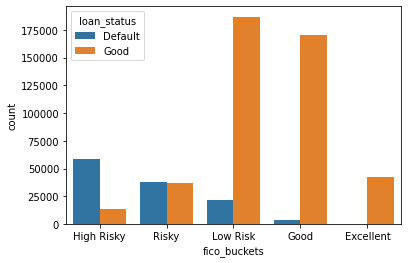

In [18]:
sns.barplot(x="fico_buckets", y="count", hue="loan_status", data=loan_status_df.rename({'fico_buckets':'count'},axis='columns').reset_index())

In [19]:
pd.qcut(loan_int_df['int_rate'],5)

0         (13.33, 16.55]
1         (10.99, 13.33]
2          (8.18, 10.99]
4         (16.55, 30.99]
5         (13.33, 16.55]
               ...      
999993     (8.18, 10.99]
999994    (13.33, 16.55]
999996    (16.55, 30.99]
999997    (16.55, 30.99]
999998    (16.55, 30.99]
Name: int_rate, Length: 571506, dtype: category
Categories (5, interval[float64]): [(5.308999999999999, 8.18] < (8.18, 10.99] < (10.99, 13.33] < (13.33, 16.55] <
                                    (16.55, 30.99]]

In [20]:
loan_int_df['rate_buckets']=pd.qcut(loan_int_df['int_rate'],5,labels=['Low','Medium','High','Very High','ForgetIt'])

In [21]:
loan_int_df['rate_buckets'].value_counts()

Low          121007
High         120515
Very High    111893
ForgetIt     109591
Medium       108488
Name: rate_buckets, dtype: int64

In [22]:
loan_rate_df=loan_int_df[['loan_status','rate_buckets']].groupby(['loan_status','rate_buckets']).agg({'rate_buckets':'count'})

In [23]:
loan_rate_df.rename({'rate_buckets':'count'},axis='columns').reset_index()

,loan_status,rate_buckets,count
0,Default,Low,8035
1,Default,Medium,14877
2,Default,High,23965
3,Default,Very High,30709
4,Default,ForgetIt,43623
5,Good,Low,112972
6,Good,Medium,93611
7,Good,High,96550
8,Good,Very High,81184
9,Good,ForgetIt,65968


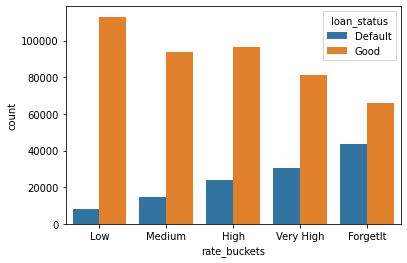

In [24]:
sns.barplot(x="rate_buckets", y="count", hue="loan_status", data=loan_rate_df.rename({'rate_buckets':'count'},axis='columns').reset_index())

In [25]:
loan_int_df[['loan_status','rate_buckets','fico_buckets']].groupby(['fico_buckets','rate_buckets']).agg({'loan_status':'count'})

loan_status
fico_buckets rate_buckets             
High Risky   Low                  4554
             Medium               8894
             High                15166
             Very High           18681
             ForgetIt            24407
Risky        Low                  6751
             Medium              10841
             High                17419
             Very High           18104
             ForgetIt            21659
Low Risk     Low                 30899
             Medium              40479
             High                48580
             Very High           45259
             ForgetIt            43058
Good         Low                 55376
             Medium              39973
             High                33904
             Very High           26420
             ForgetIt            18493
Excellent    Low                 23427
             Medium               8301
             High                 5446
             Very High            3429
             ForgetIt             1974

In [26]:
pd.crosstab(index=loan_int_df['fico_buckets'],columns=loan_int_df['rate_buckets'], margins=True)

rate_buckets,Low,Medium,High,Very High,ForgetIt,All
fico_buckets,,,,,,
High Risky,4554,8894,15166,18681,24407,71702
Risky,6751,10841,17419,18104,21659,74774
Low Risk,30899,40479,48580,45259,43058,208275
Good,55376,39973,33904,26420,18493,174166
Excellent,23427,8301,5446,3429,1974,42577
All,121007,108488,120515,111893,109591,571494


In [27]:
pd.crosstab(index=loan_int_df['fico_buckets'],columns=loan_int_df['rate_buckets']).apply(lambda x: x/x.sum(), axis=1)

rate_buckets,Low,Medium,High,Very High,ForgetIt
fico_buckets,,,,,
High Risky,0.063513,0.124041,0.211514,0.260537,0.340395
Risky,0.090285,0.144984,0.232955,0.242116,0.289660
Low Risk,0.148357,0.194354,0.233249,0.217304,0.206736
Good,0.317950,0.229511,0.194665,0.151694,0.106180
Excellent,0.550227,0.194964,0.127909,0.080536,0.046363


In [28]:
fico_rate_ct=pd.crosstab(index=loan_int_df['fico_buckets'],columns=loan_int_df['rate_buckets'])

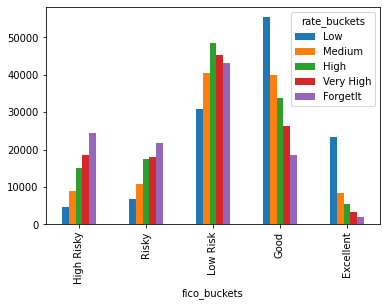

In [29]:
fico_rate_ct.plot.bar()

In [30]:
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([fico_rate_ct.iloc[0].values,fico_rate_ct.iloc[1].values, fico_rate_ct.iloc[2].values, fico_rate_ct.iloc[3].values, fico_rate_ct.iloc[4].values])

In [31]:
print ("chi2     : " ,chi2)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2     :  86145.63053225547
p-value  :  0.0
Degree for Freedom :  16


In [32]:
loan_int_df.isna().any().sum()

152

In [43]:
loan_int_df['last_fico_range_low'] = loan_int_df['last_fico_range_low'].fillna(method='bfill')

In [44]:
import math
loan_int_df['fico_score']=loan_int_df['last_fico_range_low'].apply(lambda x: int(math.ceil(int(x)/10))*10)

In [45]:
loan_int_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,fico_buckets,rate_buckets,fico_score
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,...,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,High Risky,Very High,560
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,...,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Low Risk,High,700
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,...,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Low Risk,Medium,700
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,...,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Low Risk,ForgetIt,700
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,300xx,GA,10.20,0.0,Oct-1987,690.0,694.0,0.0,NaN,NaN,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,...,4000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Good,Very High,760


In [46]:
loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts().sort_index()

500    2997
510    6767
520    7813
530    8672
540    9475
550    9507
560    9099
570    8503
580    7542
590    6448
600    5493
610    4874
620    4184
630    3481
640    2740
650    2165
660    3828
670    4919
680    3658
690    2699
700    1919
710    1435
720     956
730     568
740     420
750     283
760     219
770     161
780     129
790      88
800      70
810      50
820      25
830      13
840       6
850       3
Name: fico_score, dtype: int64

In [47]:
default_df=pd.DataFrame(loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts())

In [48]:
default_df=default_df.reset_index()

In [49]:
default_df.columns = ['fico_score','default_total']

In [50]:
default_df

,fico_score,default_total
0,550,9507
1,540,9475
2,560,9099
3,530,8672
4,570,8503
5,520,7813
6,580,7542
7,510,6767
8,590,6448
9,600,5493


In [51]:
default_df[['fico_score','default_total']].corr()

,fico_score,default_total
fico_score,1.000000,-0.887156
default_total,-0.887156,1.000000


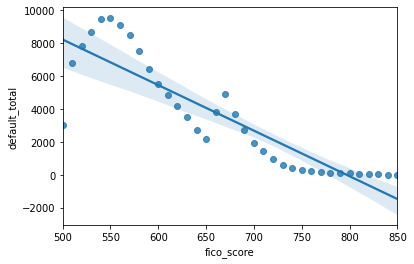

In [52]:
sns.regplot(x='fico_score',y='default_total',data=default_df) 

In [53]:
default_df[['fico_score','default_total']].corr('spearman')

,fico_score,default_total
fico_score,1.000000,-0.939511
default_total,-0.939511,1.000000


In [54]:
!pip install pwlf
import pwlf

  Created wheel for pwlf: filename=pwlf-2.0.4-cp37-none-any.whl size=16143 sha256=4551e95423d1e596301d2617515bc3a1bae9c6486810a2e0094f8b168bb4aa9b
  Stored in directory: /root/.cache/pip/wheels/aa/b4/ef/2cb67a24a71a0d9dd93a5ba02f46106e9fa34dd2e3d9d8b4a0
  Created wheel for pyDOE: filename=pyDOE-0.3.8-cp37-none-any.whl size=18178 sha256=21198da8b6706a724ad5400ae18beba209dd01085da8237632e91d1d4eb4bf92
  Stored in directory: /root/.cache/pip/wheels/7c/c8/58/a6493bd415e8ba5735082b5e0c096d7c1f2933077a8ce34544
Successfully built pwlf pyDOE


In [55]:
pwlf = pwlf.PiecewiseLinFit(default_df['fico_score'], default_df['default_total'])

In [56]:
pwise_model = pwlf.fit(4)

In [57]:
pwlf.fit_breaks

array([500.        , 536.46779027, 619.99999996, 758.94519029,
       850.        ])

In [58]:
pwlf.slopes

array([180.64934368, -73.41043634, -29.67871404,  -2.33301867])

In [59]:
pwlf.intercepts

array([-86472.51517657,  49822.37360737,  22708.70578329,   1954.82180264])

In [60]:
yHat_piecewise = pwlf.predict(default_df['fico_score'])

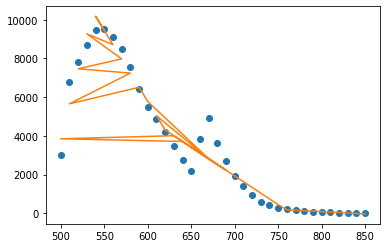

In [62]:
plt.figure()
plt.plot(default_df['fico_score'], default_df['default_total'], 'o')
plt.plot(default_df['fico_score'], yHat_piecewise, '-')
plt.show()

------------------------------------------